# Lab 4

In [1]:
!pip install psycopg2

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

## 3.1

In [4]:
sql_statement = """ select *
            from gp16.student"""

In [5]:
df=pandas.read_sql_query(sql_statement,conn)
df[:10]

,s_email,s_name,major
0,studenta@gmail.com,Student A,IA
1,studentb@gmail.com,Student B,IA
2,studentc@gmail.com,Student C,IA
3,studentd@gmail.com,Student D,IA


## 3.2

In [6]:
sql_statement = """ select gp16.professor.p_name, gp16.course.c_name
            from gp16.professor
            inner join gp16.course
            on gp16.professor.p_email = gp16.course.p_email"""

In [7]:
df=pandas.read_sql_query(sql_statement,conn)
df[:10]

,p_name,c_name
0,Stephen Marrin,Seminar on Issues in IA
1,Xuebin Wei,Data Mining
2,Orlandrew Danzell,Intro to US National Security
3,New P,new_course
4,New P,Counterfactual Reasoning


## 3.3

In [32]:
sql_statement= """
                select c_number,
                    count (s_email) as enrolled
                from gp16.enroll_list
                group by c_number
                order by enrolled desc
                """

<AxesSubplot:xlabel='c_number'>

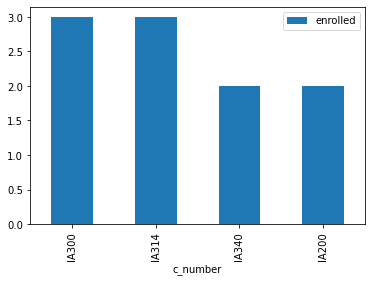

In [34]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='c_number',y='enrolled')

## 3.4

In [35]:
sql_statement= """
                select gp16.professor.p_name,
                    count (gp16.course.c_name) as num_c
                from gp16.professor
                inner join gp16.course
                on gp16.professor.p_email = gp16.course.p_email
                group by gp16.professor.p_name
                order by (num_c) desc
                """

<AxesSubplot:xlabel='p_name'>

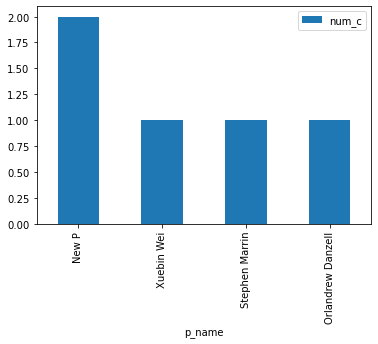

In [37]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='p_name',y='num_c')

## 3.5

In [65]:
sql_statement = """
                insert into gp16.professor(p_email, p_name, p_office)
                values ('lab4_P@jmu.edu', 'lab4 P', 'ISAT101')"""
print(sql_statement)


                insert into gp16.professor(p_email, p_name, p_office)
                values ('lab4_P@jmu.edu', 'lab4 P', 'ISAT101')


In [66]:
conn.rollback()

In [74]:
sql_statement = """
                insert into gp16.professor(p_email, p_name, p_office)
                values ('lab4_P@jmu.edu', 'lab4 P', 'ISAT101')"""
print(sql_statement)


                insert into gp16.professor(p_email, p_name, p_office)
                values ('lab4_P@jmu.edu', 'lab4 P', 'ISAT101')


In [75]:
cur.execute(sql_statement)

In [76]:
conn.commit()

In [77]:
df_student=pandas.read_sql_query('select * from gp16.professor',conn)
df_student[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT336
1,marrinsp@jmu.edu,Stephen Marrin,ENGEO2401
2,weixx@jmu.edu,Xuebin Wei,ISAT112
3,new_p@jmu.edu,New P,ISAT100
4,lab4_P@jmu.edu,lab4 P,ISAT101


In [79]:
sql_statement= """
                insert into gp16.course(c_number, c_name, c_room, p_email)
                values ('course_6', 'lab4_course', 'lab4_room', 'lab4_P@jmu.edu')"""
print(sql_statement)


                insert into gp16.course(c_number, c_name, c_room, p_email)
                values ('course_6', 'lab4_course', 'lab4_room', 'lab4_P@jmu.edu')


In [80]:
cur.execute(sql_statement)

In [81]:
conn.commit()

In [82]:
df_student=pandas.read_sql_query('select * from gp16.course',conn)
df_student[:]

,c_number,c_name,c_room,p_email
0,IA300,Seminar on Issues in IA,Isat 150,marrinsp@jmu.edu
1,IA340,Data Mining,Isat 336,weixx@jmu.edu
2,IA200,Intro to US National Security,Festival 7,danzelox@jmu.edu
3,course_5,new_course,new_room,new_p@jmu.edu
4,IA314,Counterfactual Reasoning,Engeo 1204,new_p@jmu.edu
5,course_6,lab4_course,lab4_room,lab4_P@jmu.edu


## 3.6

In [83]:
sql_statement= """
                update gp16.course
                set p_email = 'lab4_P@jmu.edu'
                where p_email = 'danzelox@jmu.edu'"""
print(sql_statement)


                update gp16.course
                set p_email = 'lab4_P@jmu.edu'
                where p_email = 'danzelox@jmu.edu'


In [84]:
cur.execute(sql_statement)

In [85]:
conn.commit()

In [86]:
df_student=pandas.read_sql_query('select * from gp16.course',conn)
df_student[:]

,c_number,c_name,c_room,p_email
0,IA300,Seminar on Issues in IA,Isat 150,marrinsp@jmu.edu
1,IA340,Data Mining,Isat 336,weixx@jmu.edu
2,course_5,new_course,new_room,new_p@jmu.edu
3,IA314,Counterfactual Reasoning,Engeo 1204,new_p@jmu.edu
4,course_6,lab4_course,lab4_room,lab4_P@jmu.edu
5,IA200,Intro to US National Security,Festival 7,lab4_P@jmu.edu


In [87]:
sql_statement= """
                delete from gp16.professor
                where p_email = 'danzelox@jmu.edu'"""
print(sql_statement)


                delete from gp16.professor
                where p_email = 'danzelox@jmu.edu'


In [88]:
cur.execute(sql_statement)

In [89]:
conn.commit()

In [90]:
df_student=pandas.read_sql_query('select * from gp16.professor',conn)
df_student[:]

,p_email,p_name,p_office
0,marrinsp@jmu.edu,Stephen Marrin,ENGEO2401
1,weixx@jmu.edu,Xuebin Wei,ISAT112
2,new_p@jmu.edu,New P,ISAT100
3,lab4_P@jmu.edu,lab4 P,ISAT101


In [91]:
cur.close()

In [92]:
conn.close()